In [1]:
import requests
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Read in our data

In [2]:
income = pd.read_csv('./data/large_train_sample.csv')
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [3]:
income.shape

(32561, 14)

In [4]:
income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [5]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  wage            32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [6]:
income.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Data Cleaning columns and values

In [7]:
# replace the ? with 'unknown'
income.replace(' ?', "unknown", inplace = True )

In [8]:
cat_columns = income.drop(columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'], axis = 1).columns

In [9]:
# Stripping whitespace from beginning of each value
for column in cat_columns:
    income[column] = income[column].apply(lambda x: x.strip())

In [10]:
#Binarize wage column
income['wage'] = np.where(income['wage'] == '>50K', 1, 0)

In [11]:
#Save as a new csv
income.to_csv('./data/train_cleaned.csv',index=False)

# Clean Test data

In [12]:
test_data = pd.read_csv('./data/test_data.csv')

In [13]:
# replace the ? with 'unknown'
test_data.replace(' ?', "unknown", inplace = True )

In [14]:
cat_columns_test = test_data.drop(columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'], axis = 1).columns

# Stripping whitespace from beginning of each value
for column in cat_columns_test:
    test_data[column] = test_data[column].apply(lambda x: x.strip())

In [15]:
#Save as a new csv
test_data.to_csv('./data/test_cleaned.csv',index=False)

# Exploratory Data Analysis

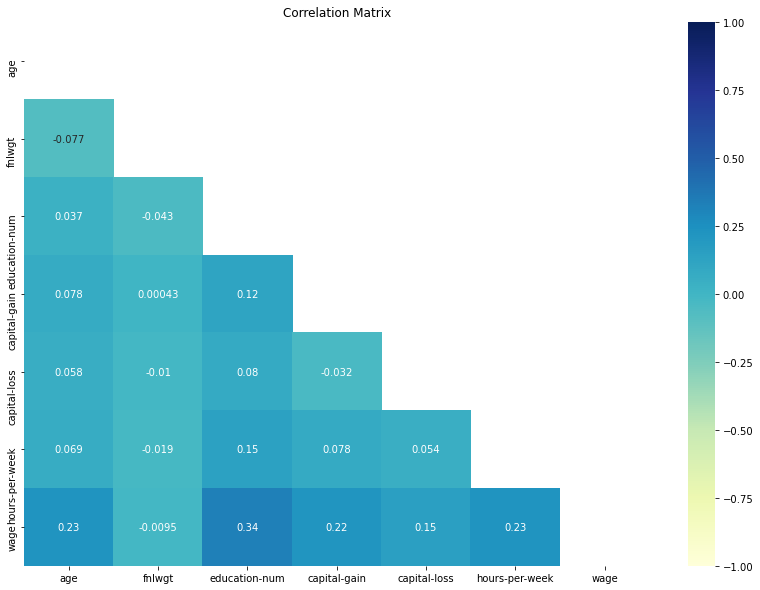

In [16]:
#Let's find the correlations between all fields
corr = income.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(14,10))
plt.title('Correlation Matrix')
sns.heatmap(corr, cmap='YlGnBu', annot=True, vmin=-1, vmax=1, mask=mask,);

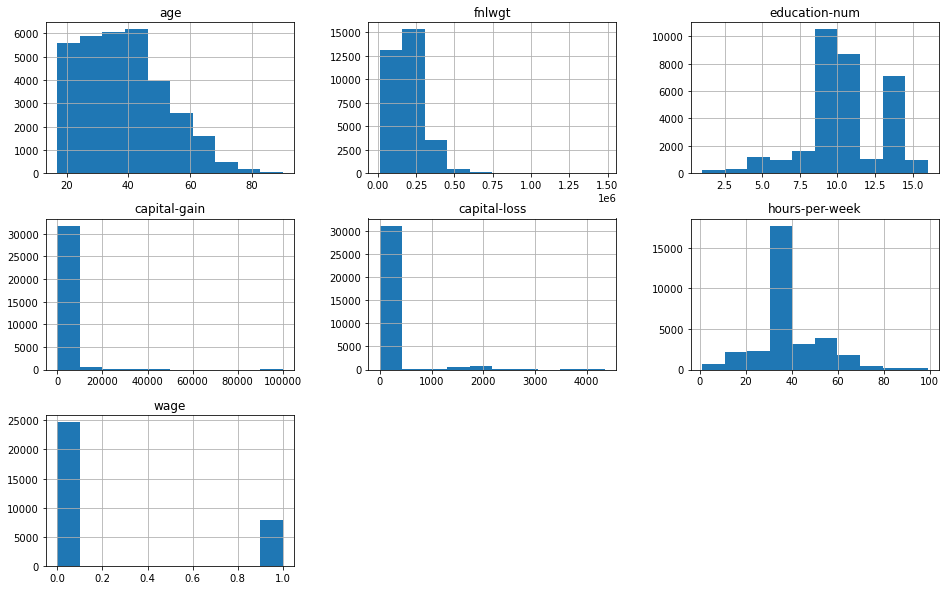

In [17]:
income._get_numeric_data().hist(figsize=(16,10));

### Assessing `capital-gain` and `capital-loss`

In [18]:
income['capital-gain'].value_counts(normalize=True).sort_values(ascending=False).head(3)

0        0.916710
15024    0.010657
7688     0.008722
Name: capital-gain, dtype: float64

In [19]:
income['capital-loss'].value_counts(normalize=True).sort_values(ascending=False).head(3)

0       0.953349
1902    0.006204
1977    0.005160
Name: capital-loss, dtype: float64

In [20]:
income['hours-per-week'].value_counts(normalize=True).sort_values(ascending=False)

40    0.467338
50    0.086576
45    0.056018
60    0.045300
35    0.039833
        ...   
94    0.000031
87    0.000031
74    0.000031
92    0.000031
82    0.000031
Name: hours-per-week, Length: 94, dtype: float64

## Visualizing Wage Target Distribution

Thanks to Juhee Sung-Schenck for making these visualizations!

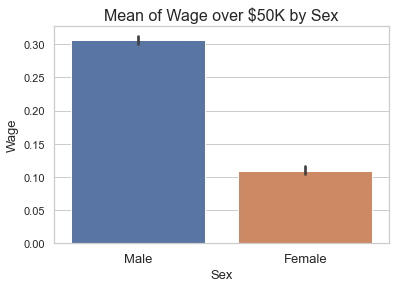

In [21]:
# How much sex impacts in wage
sns.set(style = 'whitegrid')
sns.barplot(x='sex', y='wage', data=income)
plt.title('Mean of Wage over $50K by Sex', fontsize=16)
plt.xticks(fontsize=13)
plt.xlabel('Sex', fontsize=13)
plt.ylabel('Wage', fontsize=13)
plt.savefig('./images/wage_over_50K_sex.png', bbox_inches='tight');

~30% of Males made over 50K, while only ~11% of Females made over 50K

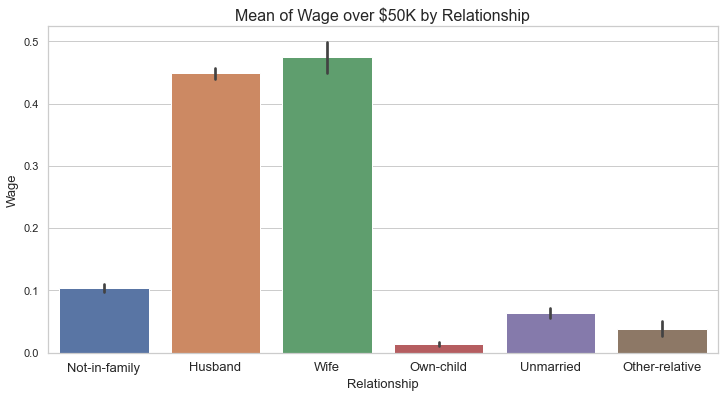

In [22]:
plt.figure(figsize = (12, 6))
sns.barplot(x='relationship', y='wage', data=income)
plt.title('Mean of Wage over $50K by Relationship', fontsize=16)
plt.xticks(fontsize=13)
plt.xlabel('Relationship', fontsize=13)
plt.ylabel('Wage', fontsize=13)
plt.savefig('./images/wage_over_50K_relationship.png', bbox_inches='tight');

The relationship feature combines many other features into one:
* Sex (Husband/Wife)
* Marital Status (Husband/Wife/Unmarried

To keep things condensed, we're going to prioritize using this feature over Marital Status and Sex
    

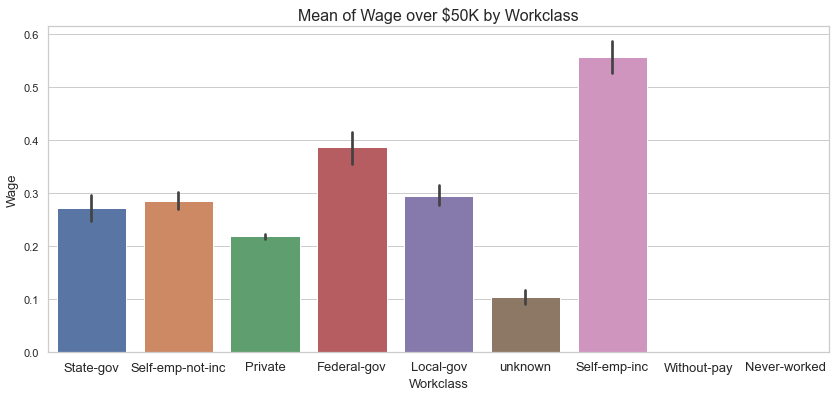

In [23]:
# how much workclass impacts in wage
plt.figure(figsize = (14, 6))
sns.set(style = 'whitegrid')
sns.barplot(x = 'workclass', y = 'wage', data = income)
plt.title('Mean of Wage over $50K by Workclass', fontsize=16)
plt.xticks(fontsize=13)
plt.xlabel('Workclass', fontsize=13)
plt.ylabel('Wage', fontsize=13)
plt.savefig('./images/wage_over_50K_workclass.png', bbox_inches='tight');

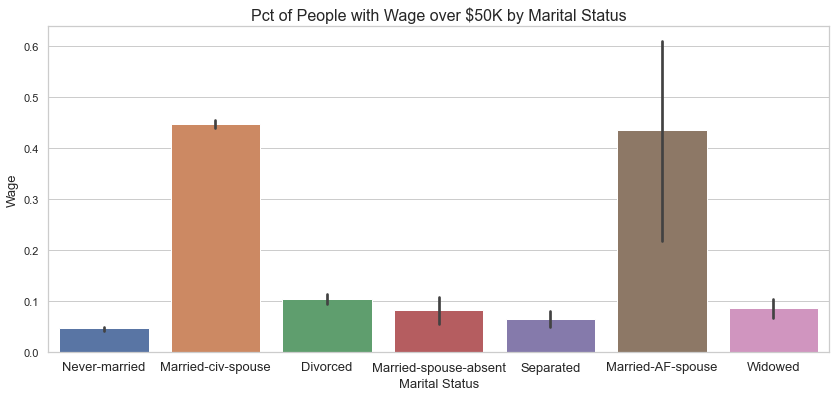

In [24]:
# how much marital status impacts in wage
plt.figure(figsize = (14, 6))
sns.set(style = 'whitegrid')
sns.barplot(x = 'marital-status', y = 'wage', data = income)
plt.title('Pct of People with Wage over $50K by Marital Status', fontsize=16)
plt.xticks(fontsize=13)
plt.xlabel('Marital Status', fontsize=13)
plt.ylabel('Wage', fontsize=13)
plt.savefig('./images/wage_over_50K_marital_status.png', bbox_inches='tight');

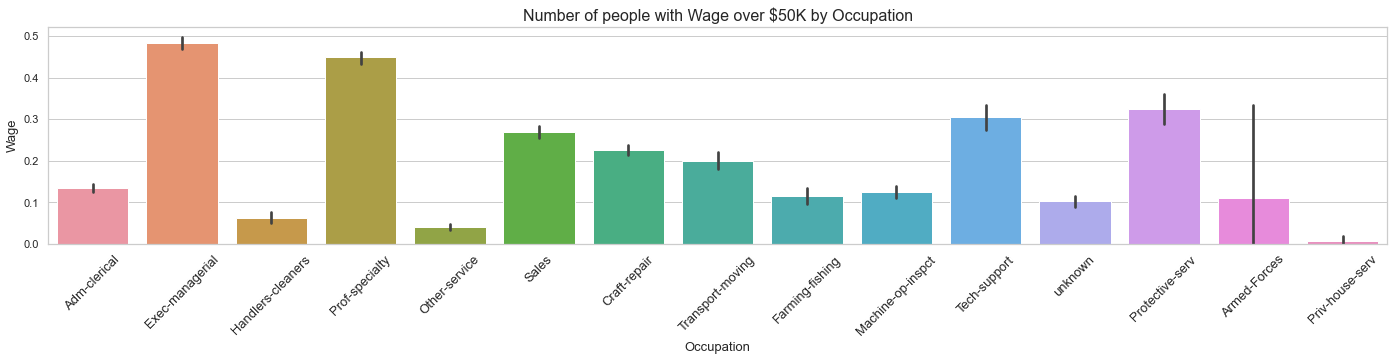

In [25]:
# how much occupation impacts wage
plt.figure(figsize = (24, 4))
sns.set(style = 'whitegrid')
sns.barplot(x = 'occupation', y = 'wage', data = income)
plt.title('Number of people with Wage over $50K by Occupation', size=16)
plt.xticks(fontsize=13)
plt.xticks(rotation=45)
plt.xlabel('Occupation', fontsize=13)
plt.ylabel('Wage', fontsize=13)
plt.savefig('./images/wage_over_50K_occupation.png', bbox_inches='tight');

Since **over 90% of the data was 0**, we chose not to use these columns for modeling

## Takeaways from EDA:
* Men make more money than women - ~30% of men make more than 50K, ~11% of womeon make more than 50K
* Marital status impacts income drastically - ~45% of people who are married make above 50K
* In the workclass feature, self employed people fare the best. Around ~55% of people in the self-employed workclass make over 50K

## What's Next?

We're going to engineer some features to use in our models